<a href="https://colab.research.google.com/github/deeksha200/Sparks-Foundation-Internship/blob/main/Prediction%20using%20Decision%20Tree%20%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SCIENCE & BUSINESS ANALYTICS INTERN**



**THE SPARKS FOUNDATION**

**GRIP JULY 2021**

**NAME: DEEKSHA RAI**

**TASK 6: Prediction using Decision Tree 
Algorithm**

**Importing Necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("imported")

imported


In [ ]:
dataset=pd.read_csv("/Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Numerical Columns**

In [ ]:
num_col=list(dataset.select_dtypes(exclude='object').columns)
num_col

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

**Object Columns**

In [ ]:
obj_col=list(dataset.select_dtypes(include='object').columns)
obj_col

['Species']

**Checking For the Null Values**

In [ ]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Univariate Analysis**

Text(0.5, 1.0, 'Species Distribution')

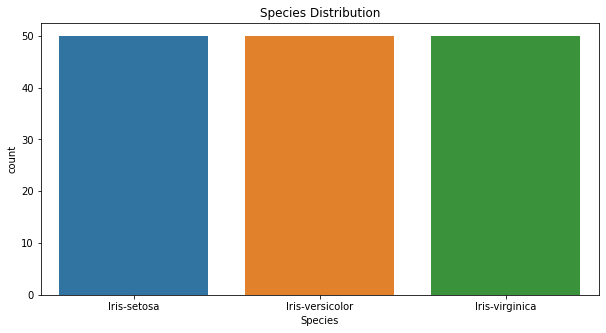

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(dataset['Species'])
plt.title("Species Distribution")



1.   This shows the distribution of different classes as per their count
2.   According to this all classes are equal in count



**SepalLengthCm**

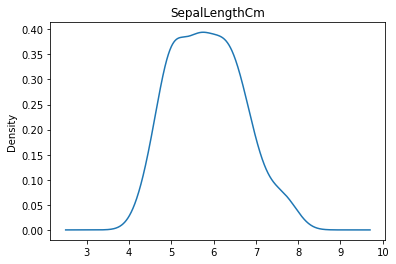

In [ ]:
dataset['SepalLengthCm'].plot(kind='density',title="SepalLengthCm")

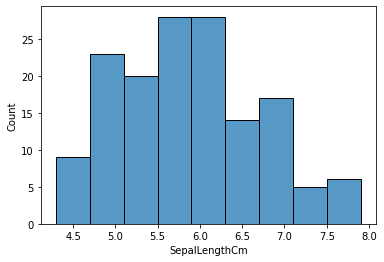

In [ ]:
sns.histplot(dataset['SepalLengthCm'])

**SepalWidthCm**

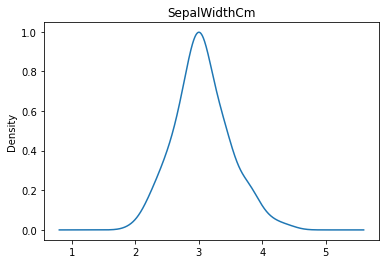

In [ ]:
dataset['SepalWidthCm'].plot(kind='density',title="SepalWidthCm")

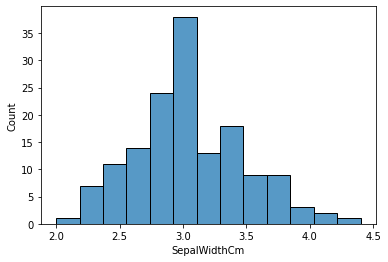

In [ ]:
sns.histplot(dataset['SepalWidthCm'])

**PetalLengthCm**

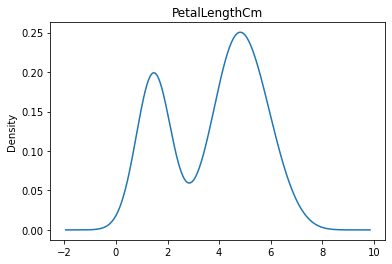

In [ ]:
dataset['PetalLengthCm'].plot(kind='density',title="PetalLengthCm")

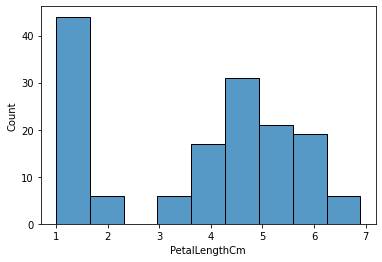

In [ ]:
sns.histplot(dataset['PetalLengthCm'])

**PetalWidthCm**

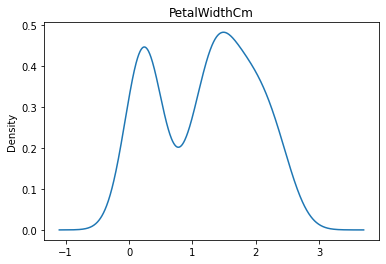

In [ ]:
dataset['PetalWidthCm'].plot(kind='density',title="PetalWidthCm")

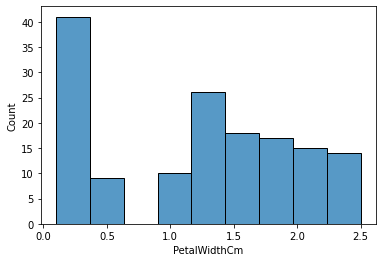

In [ ]:
sns.histplot(dataset['PetalWidthCm'])

**Boxplot to check Outliers**

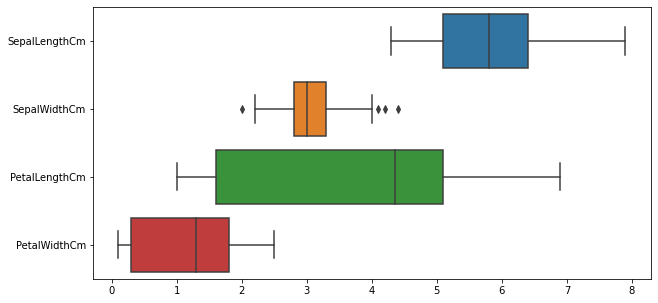

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=dataset.iloc[:,1:],orient="h")

 **Bivariate
Analysis**

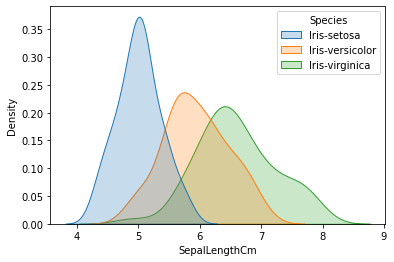

In [ ]:
sns.kdeplot(data=dataset,x='SepalLengthCm',hue='Species',fill=True)

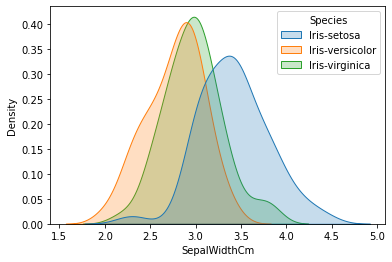

In [ ]:
sns.kdeplot(data=dataset,x='SepalWidthCm',hue='Species',fill=True)

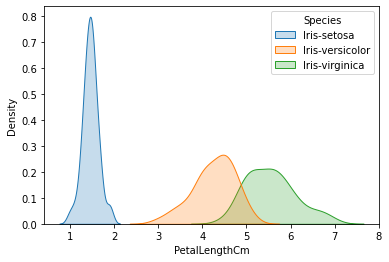

In [ ]:
sns.kdeplot(data=dataset,x='PetalLengthCm',hue='Species',fill=True)

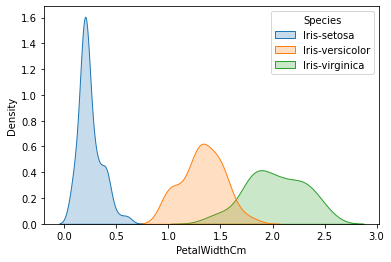

In [ ]:
sns.kdeplot(data=dataset,x='PetalWidthCm',hue='Species',fill=True)

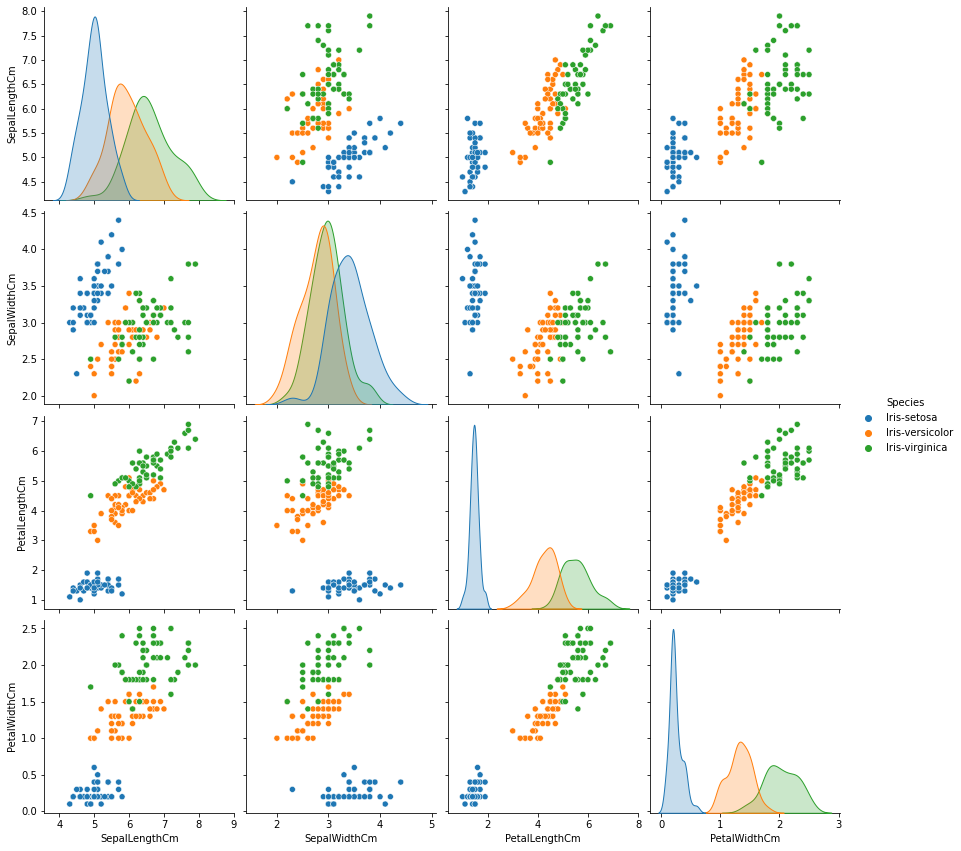

In [ ]:
sns.pairplot(dataset.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

**Feature Scaling**

In [ ]:
target=dataset['Species']
dataset.drop(['Species','Id'],inplace=True,axis=1)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(dataset)
robust_df = pd.DataFrame(robust_df, columns =['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
robust_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333
...,...,...,...,...
145,0.692308,0.0,0.242857,0.666667
146,0.384615,-1.0,0.185714,0.400000
147,0.538462,0.0,0.242857,0.466667
148,0.307692,0.8,0.300000,0.666667


**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(dataset,target,test_size=0.3,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

**Decision Tree Classifier**

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print(accuracy_score(y_test,pred))

1.0


**Hyperparametric Tuning**

In [ ]:
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

decision = GridSearchCV(model, grid_param, cv = 5, n_jobs = -1, verbose = 1)
decision.fit(x_train, y_train)
print(decision.best_params_)
print(decision.best_score_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1660 tasks      | elapsed:    3.7s


{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'random'}
0.9619047619047618


[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:   12.8s finished


**Building The Model With Best Params**

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='gini',
                                      max_depth=3,
                                      splitter='random',
                                      min_samples_leaf=3,
                                      min_samples_split=3,
                                      max_features='sqrt')
decision_tree.fit(x_train, y_train)
pred_new = decision_tree.predict(x_test)
print('Decision Tree model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred_new)))

Decision Tree model accuracy score: 0.9778


**Checking The model performance on the outside data**

In [ ]:
decision_tree.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)